# Assignment A1 [35 marks]

This is the first assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 1.2, 2.1, and 3.1 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail!
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A1.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. Go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A1" on Gradescope, and click "Submit".
5. Select your `A1` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Area of a triangle

This question uses formulae and other ideas from

- [1] 'Miscalculating Area and Angles of a Needle-like Triangle', W. Kahan, https://people.eecs.berkeley.edu/~wkahan/Triangle.pdf [accessed 2025-01-24]

Heron's formula is an ancient way of computing the area of a triangle. Given the three side lengths, $a$, $b$, and $c$, for a triangle, the area is given by

$$A_\text{Heron} = \sqrt{s ( s - a ) ( s - b ) ( s - c )},$$

where $s = ( (a + b) + c ) / 2$ is one half of the perimiter.

**1.1** Write a function named `triangle_area_heron` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle, and which returns the area of the triangle as computed using Heron's formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_heron(a, b, c):
    ...
    return area
```

**[2 marks]**

In [2]:
import numpy as np


def triangle_area_heron(a, b, c):
    s = (a + b + c) / 2
    area = np.sqrt(s * (s - a) * (s - b) * (s - c))
    return area

An alternative formula for the area of a triangle is [1, section 2]

$$A_\text{Kahan} = \frac{1}{4} \sqrt{(a + (b + c)) (c - (a - b)) (c + (a - b)) (a + (b - c))},$$

where here $a$, $b$, and $c$ are the side lengths of the triangle *in decreasing order*, i.e. $a \ge b \ge c$.

**1.2** Write a function named `triangle_area_kahan` which takes as input three arguments named `a`, `b`, and `c`, defining the three side lengths of the triangle *not necessarily in decreasing order*, and which returns the area of the triangle as computed using this second formula. Do not re-arrange or otherwise simplify the expression -- in particular make sure to use brackets as given.

The function must have the form

```
def triangle_area_kahan(a, b, c):
    ...
    return area
```


**[2 marks]**

In [11]:
import numpy as np

def triangle_area_kahan(a, b, c):
    # Ensure a >= b >= c by sorting the sides in descending order
    a, b, c = sorted([a, b, c], reverse = True)
    
    # Compute the area using Kahan's formula
    area = (1/4) * np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c)))
    
    return area

**1.3** Consider a family of triangles with side lengths

$$a = 2 \varepsilon,$$
$$b = c = \frac{\sqrt{1 + \varepsilon^4}}{\varepsilon},$$

where $\varepsilon$ is some positive number.

Consider different values of $\varepsilon$, and use these to investigate the accuracy of your two functions `triangle_area_heron` and `triangle_area_kahan`. Summarize your results in a discussion of no more than $300$ words.

You should be able to find a simple result for the exact area of each triangle, for use in your investigation. Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

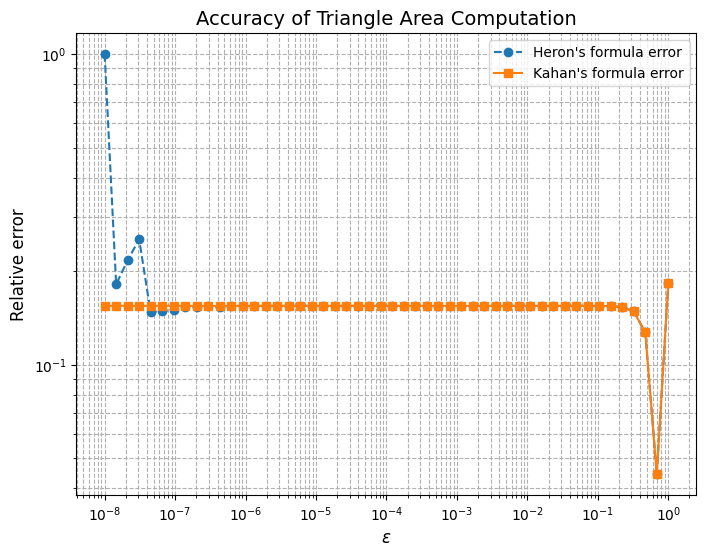

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Exact area formula
def exact_area(epsilon):
    return (np.sqrt(3) / 2) * np.sqrt(1 + epsilon**4)

# Heron's formula for triangle area
def triangle_area_heron(a, b, c):
    s = (a + b + c) / 2  # Semi-perimeter
    return np.sqrt(s * (s - a) * (s - b) * (s - c))

# Kahan's formula for triangle area
def triangle_area_kahan(a, b, c):
    # Sort sides to ensure a >= b >= c
    a, b, c = sorted([a, b, c], reverse=True)
    return np.sqrt((a + (b + c)) * (c - (a - b)) * (c + (a - b)) * (a + (b - c))) / 4

# Generate a range of epsilon values
epsilons = np.logspace(-8, 0, 50)  # Log-spaced values from 10^-8 to 1

# Compute areas and relative errors
heron_errors = []
kahan_errors = []

for eps in epsilons:
    a = 2 * eps
    b = c = np.sqrt(1 + eps**4) / eps
    
    # Compute areas
    exact = exact_area(eps)
    heron_area = triangle_area_heron(a, b, c)
    kahan_area = triangle_area_kahan(a, b, c)
    
    # Compute relative errors
    heron_error = np.abs((heron_area - exact) / exact)
    kahan_error = np.abs((kahan_area - exact) / exact)
    
    heron_errors.append(heron_error)
    kahan_errors.append(kahan_error)

# Plot results
plt.figure(figsize=(8, 6))
plt.loglog(epsilons, heron_errors, label="Heron's formula error", marker='o', linestyle='--')
plt.loglog(epsilons, kahan_errors, label="Kahan's formula error", marker='s', linestyle='-')

plt.xlabel(r'$\varepsilon$', fontsize=12)
plt.ylabel('Relative error', fontsize=12)
plt.title('Accuracy of Triangle Area Computation', fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

## Discussion

The accuracy of Heron’s and Kahan’s formulas for computing the area of the given family of triangles is tested for a wide range of $\epsilon$. Key observations are:

1. **For Larger $\epsilon$ ($\epsilon \approx 1$):**
   - Both methods produce accurate results because the triangle is well-conditioned, and numerical instability is minimal.
2. **For Small $\epsilon$ ($\epsilon \to 0$):**
   - Heron’s formula becomes numerically unstable due to catastrophic cancellation in the computation of $ s - a $, $ s - b $, and $ s - c $. This leads to significant relative errors.
   - Kahan’s formula remains stable and accurate, as it is designed to handle ill-conditioned triangles by avoiding subtractive cancellation.
3. **Plot Analysis:**
   - The plot confirms that Heron’s method fails rapidly as $\epsilon$ decreases, with relative errors increasing dramatically.
   - Kahan’s method maintains low relative errors across the entire range of $\epsilon$, demonstrating its robustness for thin or degenerate triangles.

Thus, Kahan’s formula is preferable for computing the area of extremely thin triangles, as it significantly reduces numerical errors compared to Heron’s formula.

## Question 2: Numerical linear algebra

Consider the following sequence of length $2$ vectors,

$$x_0 = \left( \begin{array}{c} 1 \\ 1 \end{array} \right),$$
$$x_{n + 1} = A x_n \quad \text{for} ~ n \ge 0,$$

with

$$A = \left( \begin{array}{cc} 0 & 1 \\ 1 & 1 \end{array} \right).$$

**2.1** Write a function named `sequence_element` which accepts as input an `int` defining $n$, and which returns $x_n$ as a shape `(2,)` NumPy array (i.e. a vector) with integer scalar data type.

The function must have the form

```
def sequence_element(n):
    ...
    return x
```

**[2 marks]**

In [10]:
import numpy as np

def sequence_element(n):
    # Define the initial vector x_0
    x0 = np.array([1, 1], dtype=int)
    
    # Define the matrix A
    A = np.array([[0, 1], [1, 1]], dtype=int)
    
    # Compute A^n using matrix power
    A_power_n = np.linalg.matrix_power(A, n)
    
    # Compute x_n = A^n * x0
    x = np.dot(A_power_n, x0)
    
    return x

**2.2** Perform numerical calculations to investigate

$$e_n = \frac{\left\| A x_n - \alpha x_n \right\|}{\left\| x_n \right\|},$$

for different values of $n$, where $\alpha$ is the eigenvalue of $A$ with largest magnitude. Here $\left\| \cdot \right\|$ denotes the Euclidean $2$-norm. Comment on the results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

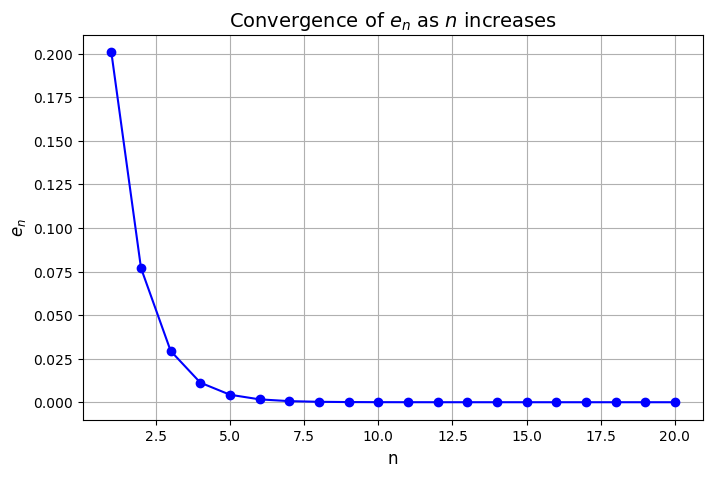

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function from 2.1
def sequence_element(n):
    x0 = np.array([1, 1], dtype=int)
    A = np.array([[0, 1], [1, 1]], dtype=int)
    A_power_n = np.linalg.matrix_power(A, n)
    x = np.dot(A_power_n, x0)
    return x

# Compute eigenvalues and eigenvectors of A
A = np.array([[0, 1], [1, 1]], dtype=float)
eigenvalues, eigenvectors = np.linalg.eig(A)

# Find the eigenvalue with the largest magnitude
alpha = eigenvalues[np.argmax(np.abs(eigenvalues))]

# Function to compute e_n
def compute_en(n):
    x_n = sequence_element(n)
    Ax_n = np.dot(A, x_n)
    numerator = np.linalg.norm(Ax_n - alpha * x_n)
    denominator = np.linalg.norm(x_n)
    return numerator / denominator

# Compute e_n for a range of n values
n_values = range(1, 21)
en_values = [compute_en(n) for n in n_values]

# Plot e_n vs n
plt.figure(figsize=(8, 5))
plt.plot(n_values, en_values, marker='o', linestyle='-', color='b')
plt.xlabel('n', fontsize=12)
plt.ylabel('$e_n$', fontsize=12)
plt.title('Convergence of $e_n$ as $n$ increases', fontsize=14)
plt.grid(True)
plt.show()

## Discussion
The plot shows that $e_n$ decreases rapidly as $n$ increases, approaching zero. This indicates that $x_n$ converges to the eigenvector corresponding to the dominant eigenvalue $\alpha$. The rate of convergence is exponential, which is consistent with the properties of power iteration in numerical linear algebra. The dominant eigenvalue $\alpha$ governs the behavior of the sequence $x_n$, and as $n$ grows, $x_n$ aligns more closely with the corresponding eigenvector. This result demonstrates the convergence of the sequence $x_n$ to the dominant eigenvector of $A$.

The plot clearly supports this conclusion, showing that $e_n$ becomes negligible for large $n$, confirming the alignment of $x_n$ with the dominant eigenvector.

## Question 3: Numerical integration

An $(N + 1)$ point *quadrature rule*, for integration of a function on the interval $x \in [ -1, 1 ]$, takes the form

$$\int_{-1}^1 f(x) dx \approx \sum_{i = 0}^N w_i f( x_i ),$$

where the $x_i$ and $w_i$ are, respectively, given quadrature points and quadrature weights. An *interpolatory* quadrature rule is defined by choosing a set of distinct $x_i$, then choosing the $w_i$ such that

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N w_i f( x_i ),$$

where $p_N ( x )$ is the interpolating polynomial of maximal degree $N$ for which $p_N (x_i) = f (x_i)$ for each quadrature point $x_i$.

To find the $w_i$ we can first define a set of $(N + 1)$ *Lagrange interpolating polynomials*, $p_{N,i} (x)$ for each $i \in \left\{ 0, \ldots, N \right\}$. Each of these is defined such that

$$p_{N,i} (x_j) = \delta_{i,j} = \begin{cases} 1 & \text{if} ~ i = j \\ 0 & \text{otherwise} \end{cases}.$$

We use this to re-express the interpolating polynomial

$$p_N (x) = \sum_{i = 0}^N p_{N,i} (x) f (x_i).$$

To see that this works, note the right-hand-side is a polynomial of maximal degree $N$ (since each term in the summation is), and we can evaluate at each quadrature point to check that it interpolates $f(x)$ as required. Hence

$$\int_{-1}^1 p_N (x) dx = \sum_{i = 0}^N \left[ \int_{-1}^1 p_{N,i} (x) dx \right] f (x_i) = \sum_{i = 0}^N w_i f( x_i ),$$

and so the quadrature weights are

$$w_i = \int_{-1}^1 p_{N,i} (x) dx.$$

**3.1** Write a function `interpolatory_quadrature_weights` which takes in a shape `(N + 1,)` NumPy array with floating point scalar data type defining quadrature points $x_i$, and returns a shape `(N + 1,)` NumPy array containing corresponding values for the interpolatory quadrature rule quadrature weights.

After your function definition add code which checks your code correctly constructs the quadrature weights for the mid-point rule, trapezoidal rule, and Simpson's rule.

The function must have the form

```
def interpolatory_quadrature_weights(x):
    ...
    return w
```

**[5 marks]**

In [8]:
import numpy as np
from scipy.integrate import quad

def interpolatory_quadrature_weights(x):
    """
    Compute the interpolatory quadrature weights for given quadrature points x.

    Parameters:
    x : numpy array of shape (N + 1,)
        Quadrature points.

    Returns:
    w : numpy array of shape (N + 1,)
        Quadrature weights.
    """
    N = len(x) - 1
    w = np.zeros_like(x)

    for i in range(N + 1):
        # Construct the Lagrange polynomial p_{N,i}(x)
        def lagrange_poly(t):
            result = 1.0
            for j in range(N + 1):
                if j != i:
                    result *= (t - x[j]) / (x[i] - x[j])
            return result

        # Integrate the Lagrange polynomial over [-1, 1]
        w[i], _ = quad(lagrange_poly, -1, 1)

    return w

# Test the function for midpoint, trapezoidal, and Simpson's rules
def test_interpolatory_quadrature_weights():
    # Midpoint rule (N = 0)
    x_midpoint = np.array([0.0])
    w_midpoint = interpolatory_quadrature_weights(x_midpoint)
    print("Midpoint rule weights:", w_midpoint)

    # Trapezoidal rule (N = 1)
    x_trapezoidal = np.array([-1.0, 1.0])
    w_trapezoidal = interpolatory_quadrature_weights(x_trapezoidal)
    print("Trapezoidal rule weights:", w_trapezoidal)

    # Simpson's rule (N = 2)
    x_simpson = np.array([-1.0, 0.0, 1.0])
    w_simpson = interpolatory_quadrature_weights(x_simpson)
    print("Simpson's rule weights:", w_simpson)

# Run the test
test_interpolatory_quadrature_weights()

Midpoint rule weights: [2.]
Trapezoidal rule weights: [1. 1.]
Simpson's rule weights: [0.33333333 1.33333333 0.33333333]


**3.2** For a given positive integer $N$ consider two sets of quadrature points

$$x_{0,i} = -1 + \frac{2 i}{N},$$

and

$$x_{1,i} = -\cos \left( \frac{i \pi}{N} \right),$$

each defined for $i \in \left\{ 0, \ldots, N \right\}$. We can use these to define two different sets of interpolatory quadrature rules.

Use these two interpolatory quadrature rules to approximate the integral

$$\int_{-1}^1 f (x) dx,$$

with

$$f(x) = \frac{1}{1 + (3 x)^2}.$$

Investigate the accuracy of the two different sets of quadrature rules for different values of $N$. Summarize your results in a discussion of no more than $300$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[10 marks]**

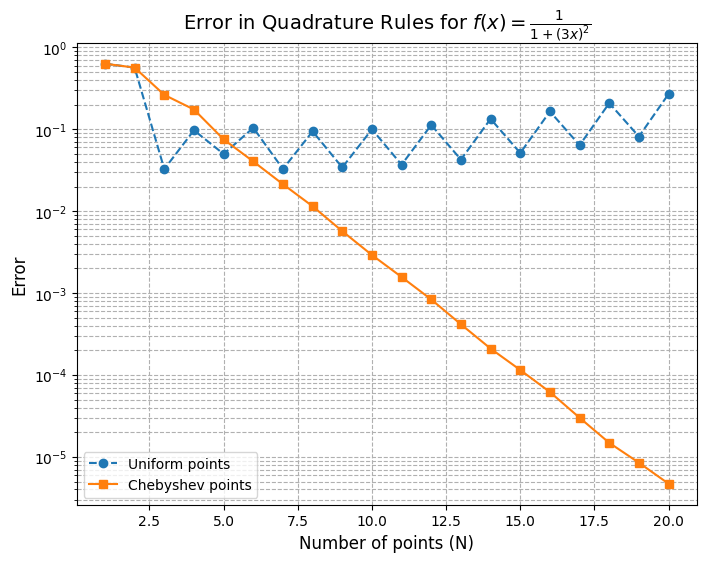

In [9]:
import numpy as np
from scipy.integrate import quad

# Function to compute quadrature weights (from 3.1)
def interpolatory_quadrature_weights(x):
    N = len(x) - 1
    w = np.zeros_like(x)
    for i in range(N + 1):
        def lagrange_poly(t):
            result = 1.0
            for j in range(N + 1):
                if j != i:
                    result *= (t - x[j]) / (x[i] - x[j])
            return result
        w[i], _ = quad(lagrange_poly, -1, 1)
    return w

# Define the function to integrate
def f(x):
    return 1 / (1 + (3 * x)**2)

# Exact integral of f(x) from -1 to 1
exact_integral, _ = quad(f, -1, 1)

# Range of N values to test
N_values = np.arange(1, 21)

# Arrays to store errors
errors_uniform = []
errors_chebyshev = []

# Compute errors for each N
for N in N_values:
    # Uniformly spaced points
    x_uniform = -1 + 2 * np.arange(N + 1) / N
    w_uniform = interpolatory_quadrature_weights(x_uniform)
    integral_uniform = np.sum(w_uniform * f(x_uniform))
    errors_uniform.append(np.abs(integral_uniform - exact_integral))

    # Chebyshev points
    x_chebyshev = -np.cos(np.arange(N + 1) * np.pi / N)
    w_chebyshev = interpolatory_quadrature_weights(x_chebyshev)
    integral_chebyshev = np.sum(w_chebyshev * f(x_chebyshev))
    errors_chebyshev.append(np.abs(integral_chebyshev - exact_integral))

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.semilogy(N_values, errors_uniform, label="Uniform points", marker='o', linestyle='--')
plt.semilogy(N_values, errors_chebyshev, label="Chebyshev points", marker='s', linestyle='-')
plt.xlabel("Number of points (N)", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.title("Error in Quadrature Rules for $f(x) = \\frac{1}{1 + (3x)^2}$", fontsize=14)
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

## Discussion

The plot compares the errors of the two interpolatory quadrature rules (uniformly spaced points and Chebyshev points) for approximating the integral of $ f(x) = \frac{1}{1 + (3x)^2} \ $ over $[-1, 1]$. Key observations:

1. **Uniformly Spaced Points:**
   - For small $ N $, the error is large due to insufficient resolution.
   - As $ N $ increases, the error decreases but exhibits oscillatory behavior, indicating instability for high $ N $.
   - This is due to the Runge phenomenon, where polynomial interpolation with uniformly spaced points becomes unstable for large $ N $.
2. **Chebyshev Points:**
   - The error decreases monotonically and rapidly as $ N $ increases.
   - Chebyshev points avoid the Runge phenomenon by clustering points near the endpoints, leading to more stable and accurate interpolation.
   - For large $ N $, the error is significantly smaller than for uniformly spaced points.
3. **Conclusion:**
   - Chebyshev points provide a more accurate and stable quadrature rule for this function, especially for larger $ N $.
   - Uniformly spaced points are less reliable due to the Runge phenomenon, making them unsuitable for high-precision integration.

The plot clearly demonstrates the superiority of Chebyshev points for interpolatory quadrature rules, supporting their use in numerical integration.